<a href="https://colab.research.google.com/github/ayush2441/EDA/blob/main/EDA_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

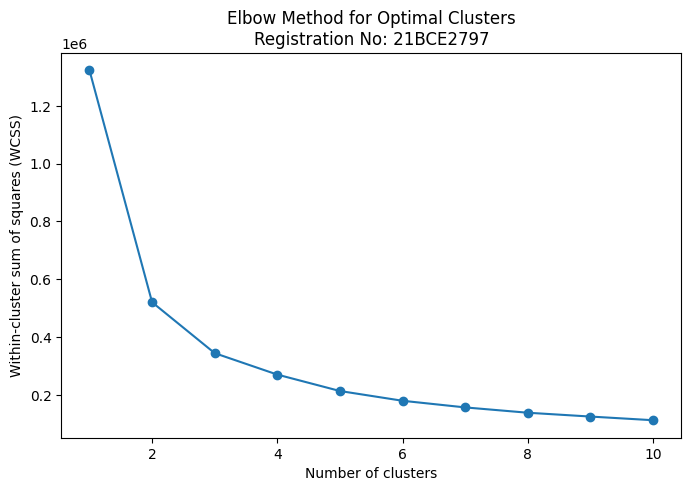

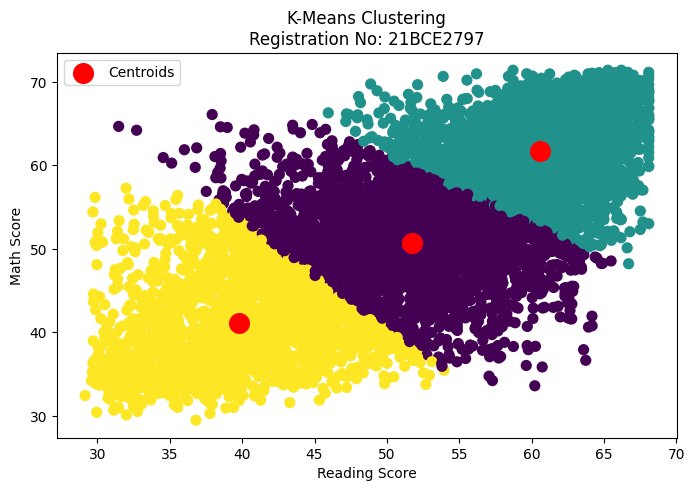

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv"
data = pd.read_csv(url)

# features for clustering
data_clustering = data[['read12', 'math12']]

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=42)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Clusters\nRegistration No: 21BCE2797')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.show()

# Fit K-means with optimal number of clusters (e.g., 3 based on elbow plot)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=25, random_state=42)
data['cluster'] = kmeans.fit_predict(data_clustering)

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(data['read12'], data['math12'], c=data['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering\nRegistration No: 21BCE2797')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend()
plt.show()


           read12      math12
count  300.000000  300.000000
mean    51.242933   52.659667
std      9.799844    9.520239
min     29.880000   32.150000
25%     43.595000   45.287500
50%     52.250000   53.405000
75%     59.452500   60.332500
max     68.090000   70.940000


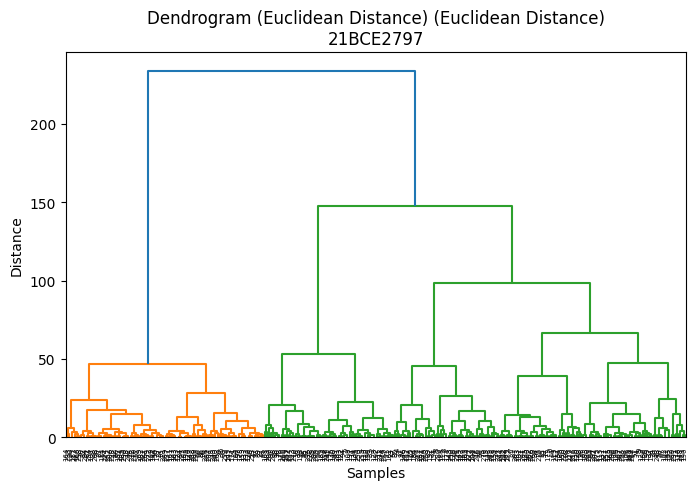

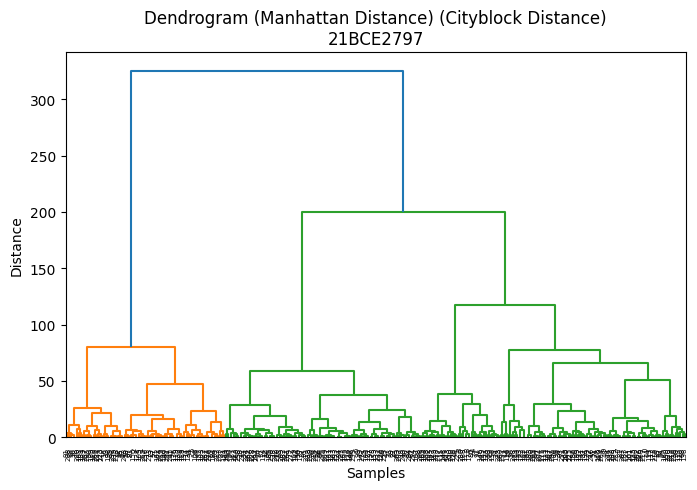

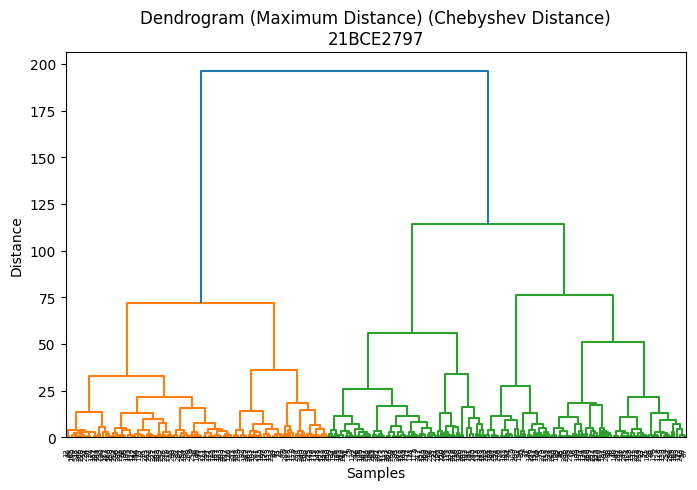

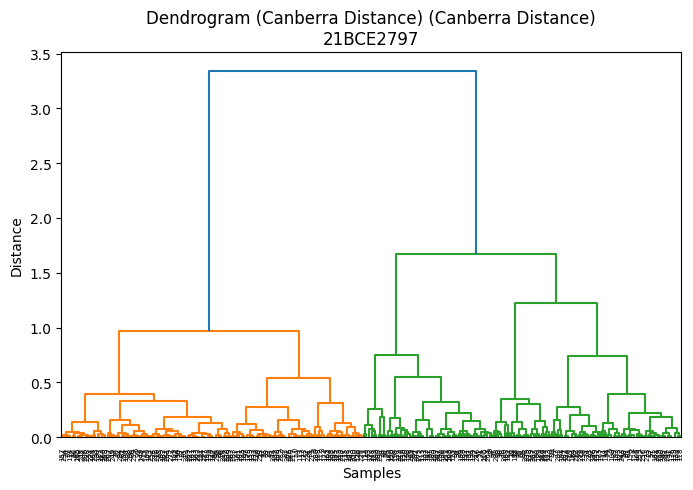

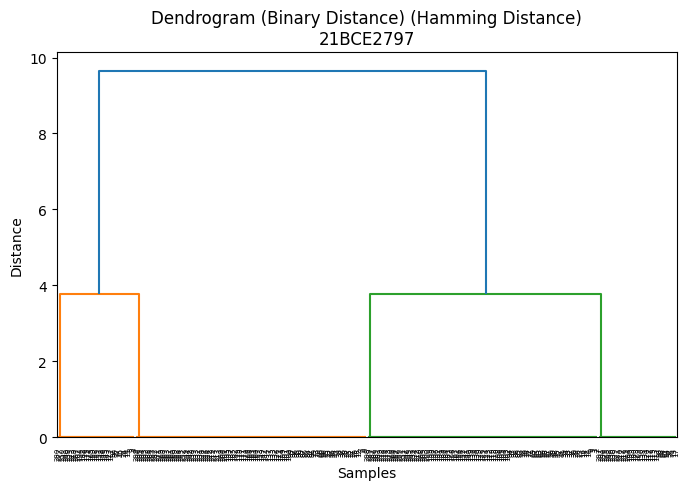

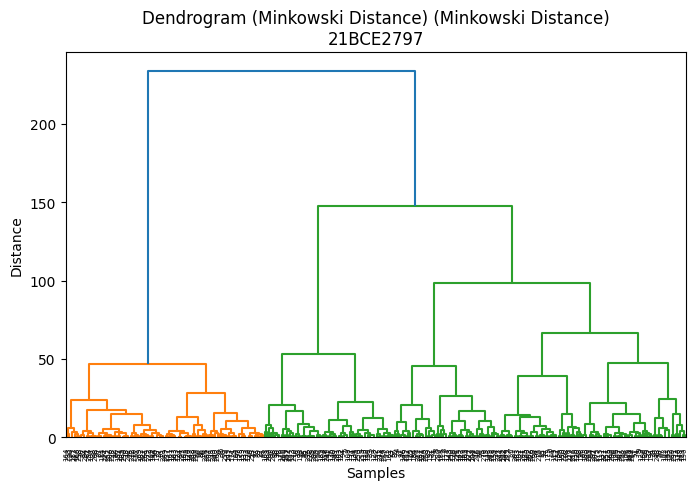

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv"
data = pd.read_csv(url)

# 'read12' and 'math12' for clustering
dataset = data[['read12', 'math12']].sample(n=300, random_state=42)

#handle missing values if any
dataset = dataset.dropna()

# Display Statistical Summary
print(dataset.describe())

#function to compute distance matrix and dendrogram
def plot_dendrogram(data, metric, method="ward", title="Dendrogram"):
    # Compute the distance matrix
    distance_matrix = pdist(data, metric=metric)
    # Generate the linkage matrix
    linkage_matrix = sch.linkage(distance_matrix, method=method)
    # Plot the dendrogram
    plt.figure(figsize=(8, 5))
    sch.dendrogram(linkage_matrix)
    plt.title(f"{title} ({metric.capitalize()} Distance)\n21BCE2797")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()
    return squareform(distance_matrix)  # Return the distance matrix for reference

# Euclidean distance and dendrogram
dist_euclidean = plot_dendrogram(dataset, metric='euclidean', title="Dendrogram (Euclidean Distance)")

# Manhattan distance and dendrogram
dist_manhattan = plot_dendrogram(dataset, metric='cityblock', title="Dendrogram (Manhattan Distance)")

# Maximum distance and dendrogram
dist_maximum = plot_dendrogram(dataset, metric='chebyshev', title="Dendrogram (Maximum Distance)")

# Canberra distance and dendrogram
dist_canberra = plot_dendrogram(dataset, metric='canberra', title="Dendrogram (Canberra Distance)")

# Binary distance and dendrogram
# Convert the data to binary format for binary distance
dataset_binary = (dataset > dataset.median()).astype(int)
dist_binary = plot_dendrogram(dataset_binary, metric='hamming', title="Dendrogram (Binary Distance)")

# Minkowski distance (example with p=1.5) and dendrogram
dist_minkowski = plot_dendrogram(dataset, metric='minkowski', title="Dendrogram (Minkowski Distance)", method='ward')
